In [72]:
import spacy
import json
from spacy.tokens import DocBin
from spacy.tokens import Doc

In [73]:
def load_data(fileName):
    with open(fileName, mode='rb') as file: # b is important -> binary
        doc_bin = DocBin().from_disk(file.read())
        docs = list(doc_bin.get_docs(nlp.vocab))
        return docs

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [74]:
nlp = spacy.load("models/model-best")

In [75]:
db = DocBin().from_disk(("trainset/dev.spacy"))
doc_list = list(db.get_docs(nlp.vocab))

docs = []
for doc in doc_list:
    ents = [(ee.start_char, ee.end_char, ee.label_) for ee in doc.ents]
    docs.append([doc, {'entities':ents}] )

In [76]:
from spacy.training import offsets_to_biluo_tags
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        new = doc[0]
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector

In [77]:
def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

In [78]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [79]:
# sorted(set(create_total_target_vector(docs)))

In [80]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)
    return confusion_matrix(y_true, y_pred)

In [81]:
# generate_confusion_matrix(docs)

In [82]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm, ax, pyplot

['Brand', 'Brand', 'MPN', 'Type', 'Model', 'Color', 'Color', 'Color', 'Fabric Type', 'Color', 'Color', 'Color', 'Fabric Type', 'Theme', 'Country/Region of Manufacture', 'Model', 'Model', 'Brand', 'Color', 'Color', 'Material', 'Type', 'Type', 'Type', 'Type', 'No Tag', 'Brand', 'Color', 'Pattern', 'Fabric Type', 'Model', 'Model', 'Type', 'No Tag', 'Type', 'Type', 'No Tag', 'No Tag', 'Type', 'Size', 'Material', 'Handle Style', 'Type', 'Type', 'Type', 'Type', 'Features', 'Handle Style', 'Color', 'Color', 'Brand', 'Model', 'Closure', 'Features', 'Color', 'Material', 'Accents', 'Handle/Strap Material', 'Type', 'Type', 'Type', 'Handle Style', 'Type', 'Accents', 'Pattern', 'Theme', 'Color', 'No Tag', 'Color', 'Type', 'Type', 'Style', 'No Tag', 'Brand', 'Brand', 'Product Line', 'Product Line', 'Model', 'Model', 'Style', 'Material', 'Type', 'Type', 'Color', 'Color', 'No Tag', 'Brand', 'MPN', 'Model', 'Features', 'Type', 'No Tag', 'Type', 'No Tag', 'Type', 'Type', 'No Tag', 'Color', 'No Tag', 'Co

(array([[ 225,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0],
        [   0, 1398,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,   21,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    7,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0],
        [   0,    0,    0,    0,   76,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    

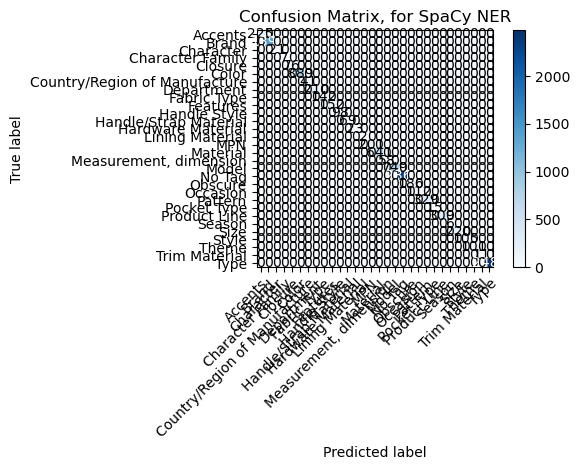

In [83]:

plot_confusion_matrix(docs,classes=get_dataset_labels(),normalize=False)